In [152]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [153]:
from jupyterthemes import jtplot
jtplot.style(theme='default', context='notebook', ticks=True, grid=False)
plt.style.use('default')

In [220]:
filepath = '../data/mfp-diaries.tsv'

# import dataset as pandas.DataFrame
import json
with open(filepath) as f:
    data = pd.read_csv(f, sep='\t', header = None)
    
data.rename(columns = {0: 'user_id', 1: 'date', 2: 'food_entries', 3: 'intakes_goals'}, inplace=True)

In [4]:
# read i-th row
i = 40000
user_id = data.iloc[i,0]
date = data.iloc[i,1]
food_entries = json.loads(data.iloc[i, 2])
aggregate_intake_goal = json.loads(data.iloc[i,3])

In [5]:
user_id

674

In [6]:
date

'2015-02-25'

In [7]:
food_entries

[{'meal': 'Breakfast',
  'dishes': [{'nutritions': [{'name': 'Calories', 'value': '2'},
     {'name': 'Carbs', 'value': '0'},
     {'name': 'Sat Fat', 'value': '0'},
     {'name': 'Protein', 'value': '0'},
     {'name': 'Chol', 'value': '0'},
     {'name': 'Vit C', 'value': '0'}],
    'name': 'Coffee - Brewed from grounds, 1 cup (8 fl oz)'},
   {'nutritions': [{'name': 'Calories', 'value': '27'},
     {'name': 'Carbs', 'value': '0'},
     {'name': 'Sat Fat', 'value': '1'},
     {'name': 'Protein', 'value': '0'},
     {'name': 'Chol', 'value': '0'},
     {'name': 'Vit C', 'value': '0'}],
    'name': 'Deli Continental - Smooth Reduced Fat Brussels Pâté, 13 g'},
   {'nutritions': [{'name': 'Calories', 'value': '58'},
     {'name': 'Carbs', 'value': '11'},
     {'name': 'Sat Fat', 'value': '0'},
     {'name': 'Protein', 'value': '2'},
     {'name': 'Chol', 'value': '0'},
     {'name': 'Vit C', 'value': '0'}],
    'name': 'Greenhalghs - Honey and Sunflower Bread, 1 slice from small 400g loa

In [10]:
aggregate_intake_goal

{'total': [{'name': 'Calories', 'value': 1278},
  {'name': 'Carbs', 'value': 188},
  {'name': 'Sat Fat', 'value': 12},
  {'name': 'Protein', 'value': 43},
  {'name': 'Chol', 'value': 6},
  {'name': 'Vit C', 'value': 4}],
 'goal': [{'name': 'Calories', 'value': 1310},
  {'name': 'Carbs', 'value': 164},
  {'name': 'Sat Fat', 'value': 15},
  {'name': 'Protein', 'value': 66},
  {'name': 'Chol', 'value': 300},
  {'name': 'Vit C', 'value': 100}]}

In [190]:
# import pathlib

# def create_folder(p):
#     pathlib.Path(p).mkdir(parents=True, exist_ok=True)
#     pathlib.Path(p+os.sep+'.gitkeep').touch()

# # root folder to put the many folders
# subpath = '../data'

# #loop over all values and create a folder for each possible date
# for i in range(data.shape[0]): 
#     this_path = subpath + os.sep + str(data.user_id[i]) + os.sep + str(data.date[i]) + os.sep
#     create_folder(this_path)
    
#     with open(this_path + 'food_entries.json', 'w') as f:
#         json.dump(data.food_entries[i], f)
        
#     with open(this_path + 'intakes_goals.json', 'w') as f:
#         json.dump(data.intakes_goals[i], f)

KeyError: 2

In [221]:
data.head()

,user_id,date,food_entries,intakes_goals
0,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2924}..."
1,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
2,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
3,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
4,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."


In [222]:
data.date = pd.to_datetime(data.date)

In [223]:
data.date.max() - data.date.min()

Timedelta('207 days 00:00:00')

In [194]:
num_days_logged = data.groupby('user_id').agg({'date': lambda x: (x.max() - x.min()).days + 1})

In [195]:
num_days_logged

,date
user_id,
1,180
2,60
3,10
4,133
5,177
...,...
9893,28
9894,166
9895,179


In [196]:
num_days_logged['date'].describe()

count    9891.000000
mean      115.019310
std        63.023556
min         1.000000
25%        61.000000
50%       137.000000
75%       175.000000
max       193.000000
Name: date, dtype: float64

In [197]:
data.intakes_goals = data.intakes_goals.astype(str)

In [224]:
# Focus on calories, carbs, protein, and fat intake
# ignore other nutrients for now, differs between users
def extract(ser, target):
    for i in range(len(ser)):
        if ser[i]['name'] == target:
            return ser[i]['value']
        
    return None

data['calorie_goal'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['goal'], 'Calories'))
data['carb_goal'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['goal'], 'Carbs'))
data['protein_goal'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['goal'], 'Protein'))
data['fat_goal'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['goal'], 'Fat'))

data['calorie_total'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['total'], 'Calories'))
data['carb_total'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['total'], 'Carbs'))
data['protein_total'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['total'], 'Protein'))
data['fat_total'] = data.intakes_goals.apply(lambda x: extract(json.loads(x)['total'], 'Fat'))

In [225]:
data.head()

,user_id,date,food_entries,intakes_goals,calorie_goal,carb_goal,protein_goal,fat_goal,calorie_total,carb_total,protein_total,fat_total
0,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2924}...",3173.0,396.0,160.0,105.0,2924.0,340.0,186.0,114.0
1,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}...",1572.0,196.0,79.0,52.0,2430.0,96.0,50.0,37.0
2,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}...",1832.0,229.0,92.0,61.0,1862.0,158.0,114.0,54.0
3,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}...",1685.0,210.0,85.0,56.0,2251.0,187.0,98.0,60.0
4,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}...",1597.0,199.0,80.0,53.0,2001.0,113.0,202.0,81.0


In [226]:
t = data.groupby('user_id')[['calorie_goal', 'carb_goal', 'protein_goal', 'fat_goal']].nunique()

In [227]:
t

,calorie_goal,carb_goal,protein_goal,fat_goal
user_id,,,,
1,168,120,76,61
2,16,17,16,15
3,4,4,3,3
4,25,24,18,17
5,34,0,31,27
...,...,...,...,...
9893,22,21,20,0
9894,1,1,1,1
9895,152,108,99,46


In [228]:
data.groupby('user_id').calorie_goal.nunique()

user_id
1       168
2        16
3         4
4        25
5        34
       ... 
9893     22
9894      1
9895    152
9896      3
9897     49
Name: calorie_goal, Length: 9896, dtype: int64

In [229]:
# Number of times calorie goal was changed
t.describe()

,calorie_goal,carb_goal,protein_goal,fat_goal
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,31.109539,22.252627,18.994442,14.561843
std,37.420116,24.198005,19.410089,13.876763
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,3.000000
50%,16.000000,13.000000,12.000000,11.000000
75%,44.000000,33.000000,28.000000,22.000000
max,174.000000,139.000000,130.000000,123.000000


# Preprocessing
    - filter out users with at less than two weeks of data
    - filter out users with less than 20 days of meals logged
    - explore/remove users with outlying nutrition goals
        - dropped users with more than 10 days of calorie goals > 5000

In [230]:
user_data = pd.DataFrame()

# Frequency of days with meals logged by user
user_data['use_period'] = data.groupby('user_id').date.apply(lambda x: (x.max() - x.min()).days)
user_data['num_days_logged'] = data.groupby('user_id').date.count()
user_data['freq_logged'] = user_data['num_days_logged']/user_data['use_period']
user_data.reset_index(drop=False, inplace=True)
nusers = data.user_id.nunique()

In [231]:
data1 = data.copy()

In [232]:
# Drop users with usage period less than 2 weeks
drop = user_data.loc[user_data.use_period < 14].index
user_data.drop(index=drop, inplace=True)

# Drop users with less than 14 days of meal-logging
drop = user_data.loc[user_data['num_days_logged'] < 14].index
user_data.drop(index=drop, inplace=True)

data = data.loc[data.user_id.isin(user_data.user_id.unique())]

nusers1 = data.user_id.nunique()
print(f'{nusers-nusers1} users dropped')
print(f'{nusers1} users remaining')

2512 users dropped
7384 users remaining


In [233]:
# How many users without protein, carb, fat, and calorie goals?
users_with_nan_goals = data.loc[(data[['calorie_goal', 'carb_goal', 'protein_goal', 'fat_goal']].isna().sum(axis=1) == True)].user_id.unique()
num_nans_users = data.loc[data.user_id.isin(users_with_nan_goals), ['user_id', 'calorie_goal', 'carb_goal', 'protein_goal', 'fat_goal']].groupby('user_id').apply(lambda x: x.isna().sum())

# Number of nans for macronutrient goals for users
num_nans_users.head()

,user_id,calorie_goal,carb_goal,protein_goal,fat_goal
user_id,,,,,
5,0,0,179,0,0
25,0,0,30,0,0
31,0,0,180,0,0
168,0,0,0,130,0
173,0,0,127,0,0


In [234]:
num_nans_users.loc[num_nans_users.calorie_goal > 0]

,user_id,calorie_goal,carb_goal,protein_goal,fat_goal
user_id,,,,,


All users have calorie goals. As long as there is a calorie goal, I think we can keep these users even if they don't have main macronutrient goals.

<AxesSubplot:xlabel='calorie_goal', ylabel='Count'>

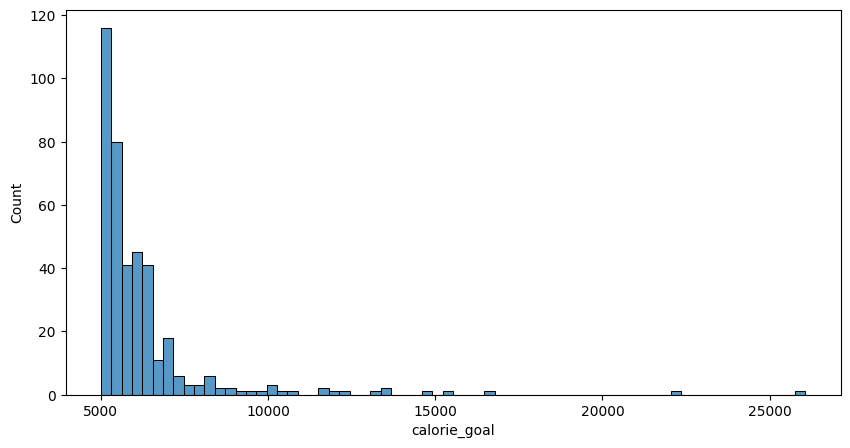

In [235]:
plt.figure(figsize=(10, 5))
sns.histplot(data.loc[data.calorie_goal > 5000, 'calorie_goal'])

In [236]:
# How many days did users have outlying calorie goals
t = data.loc[data.calorie_goal > 5000].groupby('user_id').calorie_goal.count()

In [237]:
t.describe()

count    136.000000
mean       2.897059
std        5.026271
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       39.000000
Name: calorie_goal, dtype: float64

In [238]:
t[t>10]

user_id
717     13
1543    33
3494    24
4143    14
6957    39
Name: calorie_goal, dtype: int64

In [239]:
t.describe()

count    136.000000
mean       2.897059
std        5.026271
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       39.000000
Name: calorie_goal, dtype: float64

In [240]:
# Drop these 5 users with greater than 10 days with calorie goals > 5000
drop = data.loc[data.user_id.isin(t[t>10].index.unique())].index
data.drop(index=drop, inplace=True)

In [241]:
data.head()

,user_id,date,food_entries,intakes_goals,calorie_goal,carb_goal,protein_goal,fat_goal,calorie_total,carb_total,protein_total,fat_total
0,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2924}...",3173.0,396.0,160.0,105.0,2924.0,340.0,186.0,114.0
1,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}...",1572.0,196.0,79.0,52.0,2430.0,96.0,50.0,37.0
2,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}...",1832.0,229.0,92.0,61.0,1862.0,158.0,114.0,54.0
3,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}...",1685.0,210.0,85.0,56.0,2251.0,187.0,98.0,60.0
4,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}...",1597.0,199.0,80.0,53.0,2001.0,113.0,202.0,81.0


In [242]:
print(f'{data.user_id.nunique()} users remaining')

7379 users remaining


In [243]:
data.to_pickle('cleaned_df.pkl')

In [5]:
import bz2
import _pickle as cPickle

In [247]:
# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f: 
        cPickle.dump(data, f)

compressed_pickle('cleaned', data) 

In [6]:
# Load any compressed pickle file
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('cleaned.pbz2') 

In [7]:
data.head()

,user_id,date,food_entries,intakes_goals,calorie_goal,carb_goal,protein_goal,fat_goal,calorie_total,carb_total,protein_total,fat_total
0,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2924}...",3173.0,396.0,160.0,105.0,2924.0,340.0,186.0,114.0
1,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}...",1572.0,196.0,79.0,52.0,2430.0,96.0,50.0,37.0
2,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}...",1832.0,229.0,92.0,61.0,1862.0,158.0,114.0,54.0
3,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}...",1685.0,210.0,85.0,56.0,2251.0,187.0,98.0,60.0
4,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}...",1597.0,199.0,80.0,53.0,2001.0,113.0,202.0,81.0


# What macronutrients are predictive of achieving goals